## Load Data, Get Representation, Train Binary Classification RNN Model
(Binary classification on log fold change)

In [3]:
import sys

sys.path.append("src/")
from importlib import reload
import src.preprocessing.data_loading as data_loading
import models.experiment as experiment
import models.rnn as rnn

reload(data_loading)
reload(experiment)
reload(rnn)

R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R3.csv")
protein_of_interest = "MDM2"
other_protein = "12ca5"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.BINARY_CLASSIFICATION,
)
result = experiment.BinaryClassificationExperiment().run_adhoc_experiment(
    X, y, rnn.BinaryClassificationRNN
)


Epoch 1/16
400/400 [==============================] - 8s 6ms/step - loss: 0.6471 - accuracy: 0.6492 - recall_1: 0.0059 - precision_1: 0.3584
Epoch 2/16
400/400 [==============================] - 2s 6ms/step - loss: 0.6431 - accuracy: 0.6508 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 3/16
400/400 [==============================] - 2s 6ms/step - loss: 0.6408 - accuracy: 0.6508 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 4/16
400/400 [==============================] - 2s 6ms/step - loss: 0.6391 - accuracy: 0.6508 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 5/16
400/400 [==============================] - 2s 6ms/step - loss: 0.6360 - accuracy: 0.6531 - recall_1: 0.0111 - precision_1: 0.7107
Epoch 6/16
400/400 [==============================] - 2s 6ms/step - loss: 0.6333 - accuracy: 0.6546 - recall_1: 0.0147 - precision_1: 0.7892
Epoch 7/16
400/400 [==============================] - 2s 6ms/step - loss: 0.6309 - accuracy: 0.6550 - recall_1: 0.0175 - precision

## Load Data, Get Representation, Train Joint Regression RNN Model
(Joint Regression on log fold change & p-value)

In [4]:

import sys

sys.path.append("./src/")
from importlib import reload
import src.preprocessing.data_loading as data_loading
import models.experiment as experiment
import models.rnn as rnn

reload(data_loading)
reload(experiment)
reload(rnn)

R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R3.csv")
protein_of_interest = "MDM2"
other_protein = "12ca5"
X, y = data_loading.build_dataset(
    R3_lib,
    protein_of_interest=protein_of_interest,
    other_protein=other_protein,
    dataset_type=data_loading.DATASET_TYPE.JOINT_REGRESSION,
)
result = experiment.RegressionExperiment().run_adhoc_experiment(
    X, y, rnn.RegressionRNN, load_trained_model=False
)

/Users/yitongtseo/Documents/GitHub/ml_phage_display/src/preprocessing/y_representation.py:66: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  lib["pvalues"] = sp.stats.ttest_ind(


Epoch 1/16
186/186 [==============================] - 31s 165ms/step - loss: 0.9206 - two_channel_mse: 0.9206 - fold_rmse: 0.9311 - p_value_rmse: 0.9166 - val_loss: 0.9426 - val_two_channel_mse: 0.9426 - val_fold_rmse: 0.9736 - val_p_value_rmse: 0.9034 - lr: 0.0010
Epoch 2/16
186/186 [==============================] - 31s 168ms/step - loss: 0.8238 - two_channel_mse: 0.8238 - fold_rmse: 0.8337 - p_value_rmse: 0.8117 - val_loss: 0.8374 - val_two_channel_mse: 0.8374 - val_fold_rmse: 0.8531 - val_p_value_rmse: 0.8111 - lr: 0.0010
Epoch 3/16
186/186 [==============================] - 31s 167ms/step - loss: 0.7678 - two_channel_mse: 0.7678 - fold_rmse: 0.7752 - p_value_rmse: 0.7587 - val_loss: 0.7466 - val_two_channel_mse: 0.7466 - val_fold_rmse: 0.7599 - val_p_value_rmse: 0.7228 - lr: 0.0010
Epoch 4/16
186/186 [==============================] - 31s 165ms/step - loss: 0.7317 - two_channel_mse: 0.7317 - fold_rmse: 0.7383 - p_value_rmse: 0.7280 - val_loss: 0.7156 - val_two_channel_mse: 0.7156 

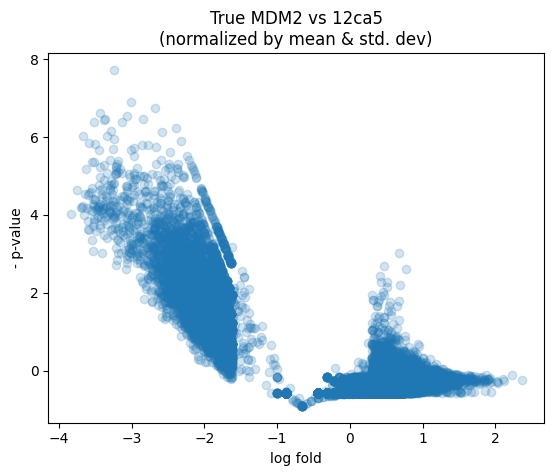

In [5]:
import matplotlib.pyplot as plt

def show_volcano(y, protein_of_interest, other_protein, title_addendum=""):
    plt.title(
        title_addendum
        + protein_of_interest
        + " vs "
        + other_protein
        + "\n(normalized by mean & std. dev)"
    )
    plt.ylabel("- p-value")
    plt.xlabel("log fold")
    plt.scatter(y[:, 1], -y[:, 0], alpha=0.2)
    plt.show()

show_volcano(
    y, protein_of_interest, other_protein, title_addendum="True "
)

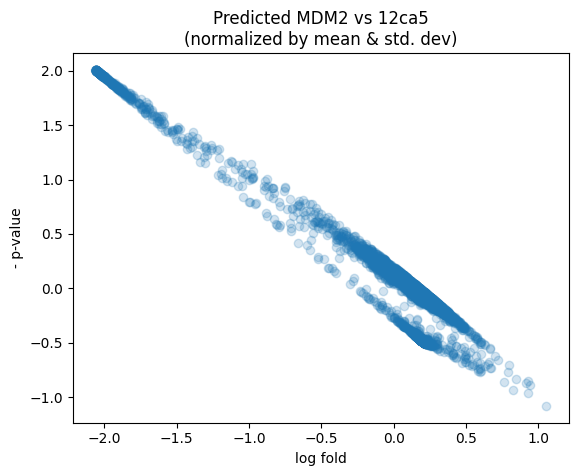

In [6]:
# TODO: From this volcan plot we can see that this RNN is not learning the regression task well... :'^(
# Unsure if this is an architecture problem or a bug in the way I've formulated the loss function 
# Tend to think it's a bug in the loss function simply because the results for p-value just seem so off...

# The predicted distribution for the log fold change actually look relatively decent 
# But the loss of log fold change and the p-value both seem to be decreasing nicely during training.
# I think the best way to debug is to isolate training just the p-value for regression
# and then isolate just the log fold for regression... Check that they each can learn the distribution separately.
show_volcano(
    result.y_pred, protein_of_interest, other_protein, title_addendum="Predicted "
)

In [11]:
# Load other data libraries 
R3_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R3.csv")
R2_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R2.csv")
R1_lib = data_loading.read_data_and_preprocess(datafile="12ca5-MDM2-mCDH2-R1.csv")

ImportError: cannot import name 'two_channel_mse' from 'models.rnn' (/Users/yitongtseo/Documents/GitHub/ml_phage_display/./src/models/rnn.py)

## Investigate Input Data

<AxesSubplot: xlabel='c_cnt', ylabel='Count'>

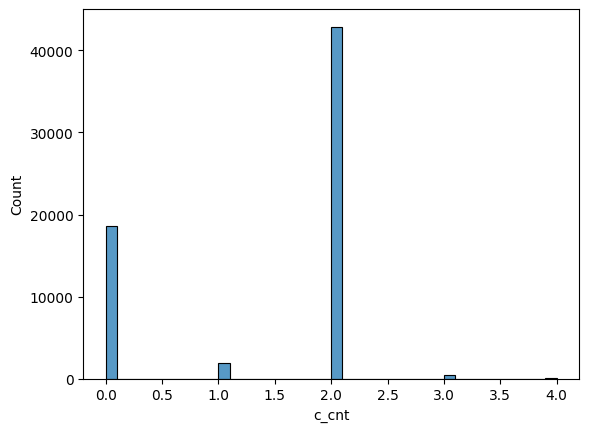

In [9]:
import seaborn as sns
sns.histplot(R3_lib['c_cnt'])

In [10]:
log_ratio_12ca5, _ = data_loading.build_dataset(R3_lib, protein_of_interest='12ca5')
sns.histplot(log_ratio_12ca5[R3_lib.is_dya==True], binwidth=0.2)
plt.title('DYA peptide')

IndexError: list index out of range

In [21]:
sns.histplot(log_ratio_12ca5[R3_lib.is_lle==True], binwidth=0.2, alpha=0.5)
plt.title('LLE peptide')

KeyError: '12ca5_log_ratio'

In [22]:
print((R3_lib.loc[R3_lib.is_lle==True]['12ca5_log_ratio']>0).sum())
print((R3_lib.loc[R3_lib.is_lle==True]['12ca5_log_ratio']<=0).sum())

KeyError: '12ca5_log_ratio'

Text(0.5, 1.0, 'all peptide')

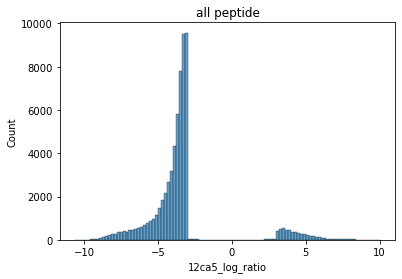

In [ ]:
sns.histplot(R3_lib['12ca5_log_ratio'], binwidth=0.2, alpha=0.7)
plt.title('all peptide')
# sns.histplot(R3_lib.loc[R3_lib.is_dya==True]['12ca5_log_ratio'], binwidth=0.2)

### model performance results

In [ ]:
print(acc)
print(pre)
print(rec)

[0.6483550832226304, 0.6542158318355865, 0.6634104407627384, 0.6598937167864958, 0.6517661769302907]
[0.6417112299465241, 0.6702702702702703, 0.6440677966101694, 0.7009803921568627, 0.751937984496124]
[0.026356248627278717, 0.027629233511586453, 0.026158788435061954, 0.03225078935498421, 0.021455430214554302]


In [ ]:
print(np.array(acc).mean(), np.array(acc).var())
print(np.array(pre).mean(), np.array(pre).var())
print(np.array(rec).mean(), np.array(rec).var())

0.6555282499075484 2.9703237664053927e-05
0.6817935346959902 0.0016901974856322836
0.026770098028693123 1.1913351182601678e-05


### umap

In [ ]:
# get the 4th fold because the 4th model showed the best precision
# actually unnecessary, can just use whatever fold
kf = KFold(n_splits=2)
i = 0
y_reg = np.array(list(y_reg))
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
    if i==0:
        break
    i += 1

In [ ]:
embedding = reducer.fit_transform(nn_emb)

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

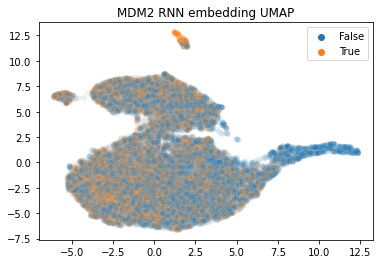

In [ ]:
# tests
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=y_train, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

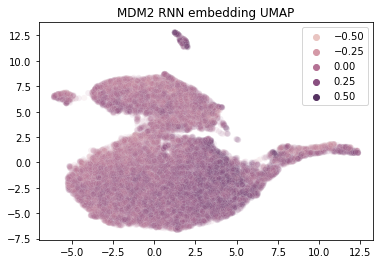

In [ ]:
# tests
X_train_prop1 = X_train[:,:,2].mean(-1)
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=X_train_prop1, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

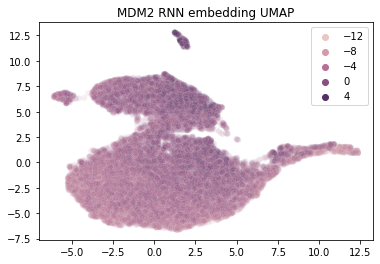

In [ ]:
# color by volume of side chain
X_train_prop2 = X_train[:,:,10].sum(-1)#.sum(-1)
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=X_train_prop2, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

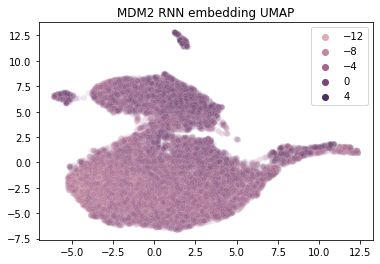

In [ ]:
# color by SASA
X_train_prop2 = X_train[:,:,9].sum(-1)#.sum(-1)
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=X_train_prop2, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

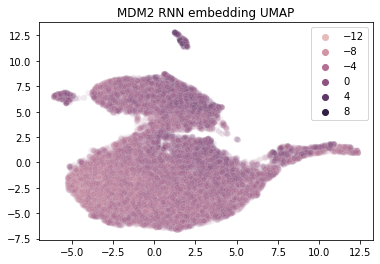

In [ ]:
# color by polarizability
X_train_prop2 = X_train[:,:,8].sum(-1)
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=X_train_prop2, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

In [ ]:
# write results
with open('mdm2_good.txt','w') as fh:
    for i in range(len(ls)):
        fh.write(f'{ls[i]}\n')

In [ ]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_train[i] == 1:
        if x2 > 10.0:
            true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [ ]:
good_seqs

['AFCDWFACY',
 'ACKPFMCWW',
 'AFCDWFKCN',
 'AFCDWYCCS',
 'ACSCFECFW',
 'AYCVWVWCS',
 'AFCDWLWCS',
 'AFCDRFWCS',
 'AFCYWCWCS',
 'AFCDGLWCS',
 'WSLNSGMFGYQW',
 'AFCDCVWCS',
 'AFCDCFLCS',
 'AFWDWFWCA',
 'ACVSFECFW',
 'AFCDWYECN',
 'ALCGFWFCD',
 'AFCVWFECY',
 'AFFDWFWCS',
 'ACECFSCWW',
 'ACSTFECWW',
 'ACKCFMCWW',
 'AYCYWFWCS',
 'ACMTFMCWC',
 'ACCDWFWCS',
 'AFKTFMCWW',
 'AFCFWFWCS',
 'ACDSFSCWW',
 'AFCDYFYCS',
 'AVCFLEWCS',
 'ALCVWVWCS',
 'AFCWFDSCQ',
 'AFCYLFWCS',
 'AFCDLFWCD',
 'ACETFMCWW',
 'AFCDWLWCP',
 'AYCVWFWCS',
 'AYCDWFECN',
 'ACMTFMCWW',
 'ACSTFEWFW',
 'AFFDCFWCS',
 'AFFAWFWCS',
 'AFCAWFWWS',
 'ACKTFLCWW',
 'AFCVWVWCC',
 'ACKTFMFWW',
 'ACTTFEWWW',
 'AFCVWFLCC',
 'AFCDWFVCY',
 'AFCVWFWRS',
 'ACYTFMCWW',
 'AFCYWVWCS',
 'AFCDWYWCS',
 'AYCDWFECN',
 'AFCVWVWGS',
 'AFCAWFWCS',
 'AFCDWVWCS',
 'ACWWWSYCS',
 'AFCVWVWCS',
 'AFWVWFWCS',
 'AFCDWFESN',
 'AFCVRFWCS',
 'ACYTFMCWW',
 'AFCDGVWCS',
 'AFCYWLWCS',
 'ALCDWFWCS',
 'AFCVWFWCS',
 'AFCDWFECY',
 'ACSPFECFW',
 'AFFFWFWCS',
 'AFCDWSWCS',
 'A

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

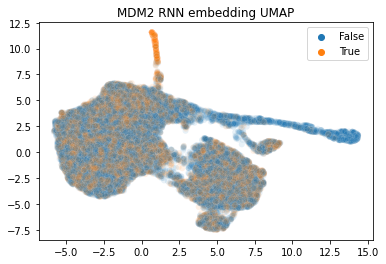

In [ ]:
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=y_train, alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

### confidence analysis

In [ ]:
y_pred = model(X_train)

Text(0.5, 0, 'MDM2_log_ratio')

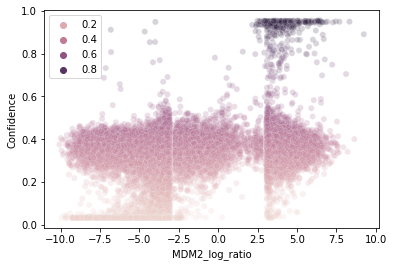

In [ ]:
# colored by predicted confidence
ax = sns.scatterplot(x=y_mdm2_reg_train, y=y_pred.numpy().reshape(-1), hue=y_pred.numpy().reshape(-1), alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('MDM2_log_ratio')

Text(0.5, 0, 'MDM2_log_ratio')

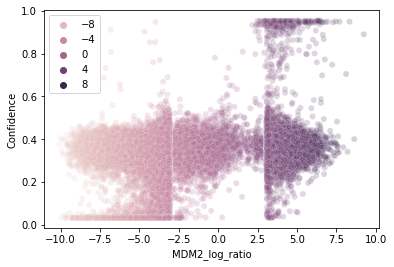

In [ ]:
# colored by true log ratio 
ax = sns.scatterplot(x=y_reg_train, y=y_pred.numpy().reshape(-1), hue=y_reg_train, alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('MDM2_log_ratio')

Text(0.5, 1.0, 'MDM2 RNN embedding UMAP')

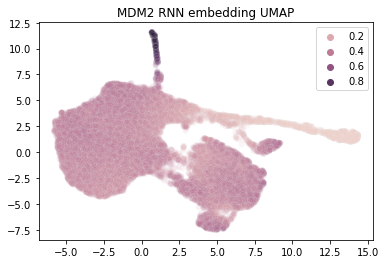

In [ ]:
# colored by predicted confidence
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=y_pred.numpy().reshape(-1), alpha=0.1)
plt.title("MDM2 RNN embedding UMAP")

### get samples from putative binder cluster

In [ ]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_train[i] == 0:
        if x1 > 10.0:
            true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [ ]:
len(good_seqs)

1133

In [ ]:
good_seqs

['AVCGDYAEC',
 'KDVFRDY',
 'ACLGDYACR',
 'ACVGDYAAC',
 'DYPDYAD',
 'MADSPDY',
 'ACYGDYACF',
 'AGCGDYAAG',
 'DWGDYAL',
 'AHCYGDYAC',
 'DDYLDYS',
 'ACWDYACYV',
 'ACWEGEYAC',
 'KVELRDY',
 'AFCLGDYSC',
 'NEDLMDY',
 'AECGDYAEC',
 'AYCFGDYSC',
 'ACLGDYSHC',
 'ACFDADYSEC',
 'ADCYGDYAC',
 'AKCWGDYAC',
 'AQCFGDYAC',
 'ALCGDYSAC',
 'ACGDYAVVC',
 'ACVVDYACW',
 'ACMGDYASC',
 'KDDLWDY',
 'NEDLLYY',
 'TADMPDY',
 'ACYCDYACA',
 'MKDVVDY',
 'DARDYAG',
 'KEDLSYY',
 'AGWMTWCEE',
 'ACYVDYAAC',
 'ARCVGDYGC',
 'LMDWPDY',
 'AHCGDYAEC',
 'AVWWGDYAC',
 'ASCVGDYSC',
 'DEKDYAA',
 'KVDLGDF',
 'ACYGDYAGC',
 'DLYDYAH',
 'SEVYDYS',
 'ACAADLRDY',
 'AGCYGDYDC',
 'ADRRDYA',
 'ARCVGDYAF',
 'ATCVGDYAC',
 'DTMDYAY',
 'ACTGDYAWC',
 'ACNFDYACW',
 'ALCSGDYAC',
 'ACFADYACL',
 'ACNLPWCEE',
 'RLDKPDY',
 'LADLHDY',
 'AFCVGDYAC',
 'ACLGDYACK',
 'HAVGFDY',
 'AKCFGDYAW',
 'ACAADMRDY',
 'AHCDVMDYG',
 'AFCLGEYAC',
 'ACVGDYAGC',
 'AAWGDYAAC',
 'ACYGDYACY',
 'QHDYPDY',
 'SDTGDYA',
 'ACGMTWCEE',
 'ARCYGDYDC',
 'APCADYACW',
 'ACCFDLGDY',

In [ ]:
ninemer_seq = []
for seq in good_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:])

In [ ]:
for seq in ninemer_seq:
    print(seq)

VCGDYAEC
CLGDYACR
CVGDYAAC
CYGDYACF
GCGDYAAG
HCYGDYAC
CWDYACYV
CWEGEYAC
FCLGDYSC
ECGDYAEC
YCFGDYSC
CLGDYSHC
DCYGDYAC
KCWGDYAC
QCFGDYAC
LCGDYSAC
CGDYAVVC
CVVDYACW
CMGDYASC
CYCDYACA
GWMTWCEE
CYVDYAAC
RCVGDYGC
HCGDYAEC
VWWGDYAC
SCVGDYSC
CYGDYAGC
CAADLRDY
GCYGDYDC
RCVGDYAF
TCVGDYAC
CTGDYAWC
CNFDYACW
LCSGDYAC
CFADYACL
CNLPWCEE
FCVGDYAC
CLGDYACK
KCFGDYAW
CAADMRDY
HCDVMDYG
FCLGEYAC
CVGDYAGC
AWGDYAAC
CYGDYACY
CGMTWCEE
RCYGDYDC
PCADYACW
CCFDLGDY
CNGDYAAF
GGLGDYAR
GCWGDYAG
DCGGYCGY
VCWGDYEC
CPCDYAAC
RCAGDYAC
CVWRWCEE
LCQGDYAC
CRATWWEE
CVGDYACA
QCYGDYSC
CVFTFCEE
CWLTWCEE
PCGDYAAC
CLGYYAAC
YCVGDYAC
CVGDYACP
VCWGDYVC
RCWDYACY
ACFGDYAW
ACFGDYAF
CWWTWCEE
CCDYAAYC
CTGDYAAC
LCYGDYAC
CFGDYASC
VCGGDYAC
GCYGDYVC
CRGDFAAC
RCYWDYAC
GCVGDYAW
VCLGDYAG
HCGDYSAC
CPDYAACF
CWDGEYAC
CWMTWGEE
LCFCDYAC
MCWGDYAC
CFGYAAYC
LCFGDYAG
CPGDYSTC
MCYGDYSC
CYGDYASC
YCFGDYAW
CYGYYAAC
CAADRLDY
CSVDYAAC
CVGDYACS
LCGDYAAC
FCHGDYAF
GWLGDYAG
ACYGDYAC
CWMRWCEE
ECLGDYAR
CYFTWCEE
WRGDYAMC
CWLRWCEE
CYGDYACR
RCVGDYSC
CGDYSATC
GCYGDYEC
G

## 12ca5

In [ ]:
y = R3_lib['12ca5_log_ratio']
y = np.array(list(y.apply(lambda e: e > 0)))
X, y = shuffle(nn_x, y, random_state=0)

### train model

In [ ]:
models = []
kf = KFold(n_splits=5)
acc, pre, rec = [], [], []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_model()
    model.fit(
        x=X_train,
        y=y_train,
        batch_size=128,
        epochs=16,
        verbose='auto',
        validation_split=0.1,
        initial_epoch=0,
        class_weight={1:0.8, 0:0.2},
        validation_freq=1,
        use_multiprocessing=False)
    
    y_pred = model(X_test)
    y_pred = y_pred.numpy().reshape(-1) >= 0.5
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print(tn, fp, fn, tp)
    print("accuracy", (tn+tp)/(tn+fp+fn+tp))
    acc.append((tn+tp)/(tn+fp+fn+tp))
    print("precision", tp/(tp+fp))
    pre.append(tp/(tp+fp))
    print("recall", tp/(tp+fn))
    rec.append(tp/(tp+fn))
    models.append(model)

# do not trust the accuracy score here, it was wrongly implemented before (it's fine now)

Epoch 1/16
360/360 [==============================] - 7s 10ms/step - loss: 0.1145 - accuracy: 0.9132 - recall_6: 0.3721 - precision_6: 0.5076 - val_loss: 0.2706 - val_accuracy: 0.9271 - val_recall_6: 0.4262 - val_precision_6: 0.6788
Epoch 2/16
360/360 [==============================] - 3s 8ms/step - loss: 0.1006 - accuracy: 0.9287 - recall_6: 0.4497 - precision_6: 0.6320 - val_loss: 0.2840 - val_accuracy: 0.9265 - val_recall_6: 0.4699 - val_precision_6: 0.6513
Epoch 3/16
360/360 [==============================] - 3s 8ms/step - loss: 0.0973 - accuracy: 0.9339 - recall_6: 0.4536 - precision_6: 0.6873 - val_loss: 0.2818 - val_accuracy: 0.9269 - val_recall_6: 0.4719 - val_precision_6: 0.6542
Epoch 4/16
360/360 [==============================] - 3s 8ms/step - loss: 0.0956 - accuracy: 0.9372 - recall_6: 0.4606 - precision_6: 0.7238 - val_loss: 0.2607 - val_accuracy: 0.9375 - val_recall_6: 0.4699 - val_precision_6: 0.7766
Epoch 5/16
360/360 [==============================] - 3s 8ms/step - los

360/360 [==============================] - 3s 9ms/step - loss: 0.0942 - accuracy: 0.9387 - recall_10: 0.4554 - precision_10: 0.7447 - val_loss: 0.2498 - val_accuracy: 0.9344 - val_recall_10: 0.4494 - val_precision_10: 0.7396
Epoch 6/16
360/360 [==============================] - 3s 9ms/step - loss: 0.0934 - accuracy: 0.9398 - recall_10: 0.4609 - precision_10: 0.7549 - val_loss: 0.2710 - val_accuracy: 0.9305 - val_recall_10: 0.4599 - val_precision_10: 0.6855
Epoch 7/16
360/360 [==============================] - 3s 9ms/step - loss: 0.0925 - accuracy: 0.9414 - recall_10: 0.4641 - precision_10: 0.7759 - val_loss: 0.2508 - val_accuracy: 0.9371 - val_recall_10: 0.4494 - val_precision_10: 0.7774
Epoch 8/16
360/360 [==============================] - 3s 8ms/step - loss: 0.0921 - accuracy: 0.9420 - recall_10: 0.4646 - precision_10: 0.7836 - val_loss: 0.2689 - val_accuracy: 0.9293 - val_recall_10: 0.4705 - val_precision_10: 0.6677
Epoch 9/16
360/360 [==============================] - 3s 8ms/step -

### results

In [ ]:
kf = KFold(n_splits=5)
acc, pre, rec = [], [], []
i = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = models[i]
    y_pred = model(X_test)
    y_pred = y_pred.numpy().reshape(-1) >= 0.5
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(tn, fp, fn, tp)
    print("accuracy", (tn+tp)/(tn+fp+fn+tp))
    acc.append((tn+tp)/(tn+fp+fn+tp))
    print("precision", tp/(tp+fp))
    pre.append(tp/(tp+fp))
    print("recall", tp/(tp+fn))
    rec.append(tp/(tp+fn))
    
    i+=1
    if i==5:
        break

11626 85 592 494
accuracy 0.9470969758537157
precision 0.853195164075993
recall 0.4548802946593002
11468 173 602 554
accuracy 0.939438930999453
precision 0.7620357634112792
recall 0.47923875432525953
11493 200 597 506
accuracy 0.9377149109096593
precision 0.71671388101983
recall 0.4587488667271079
11566 72 638 520
accuracy 0.9445139105970616
precision 0.8783783783783784
recall 0.44905008635578586
11518 169 588 521
accuracy 0.9408408877774305
precision 0.755072463768116
recall 0.4697926059513075


In [ ]:
print(np.array(acc).mean(), np.array(acc).var())
print(np.array(pre).mean(), np.array(pre).var())
print(np.array(rec).mean(), np.array(rec).var())

0.9419211232274639 1.170648113987608e-05
0.7930791301307194 0.003825949573193828
0.46234212160375215 0.00011725489146586728


Text(0.5, 0, '12ca5_log_ratio')

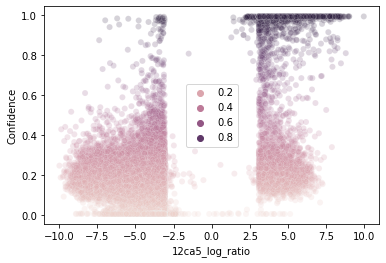

In [ ]:
# confidence analysis
ax = sns.scatterplot(x=y_12ca5_reg_train, y=y_pred.numpy().reshape(-1), hue=y_pred.numpy().reshape(-1), alpha=0.2)
ax.set_ylabel('Confidence')
ax.set_xlabel('12ca5_log_ratio')

### umap

In [ ]:
model = models[3] # third model showed the best precision
y_pred = model(X_train)

In [ ]:
kf = KFold(n_splits=5)
i = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    if i==3:
        break
    i += 1

In [ ]:
nn_emb = model.layers[2](model.layers[1](model.layers[0](X_train)))
reducer = umap.UMAP(n_neighbors=10,
                    min_dist=0.1,
                    n_components=2)

In [ ]:
embedding = reducer.fit_transform(nn_emb)

Text(0.5, 1.0, '12ca5 RNN embedding UMAP')

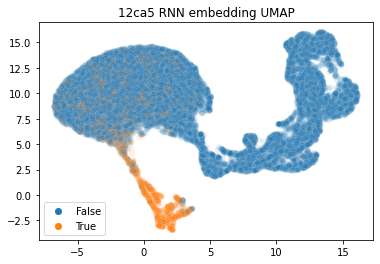

In [ ]:
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=y_train, alpha=0.1)
plt.title("12ca5 RNN embedding UMAP")

### find samples from the putative binder cluster

In [ ]:
true_cluster = []
good_seqs = []
for i in range(len(embedding)):
    x1 = embedding[i][0]
    x2 = embedding[i][1]
    if y_train[i] == 1:
        if x2 < 1.2:
            true_cluster.append(X_train[i,:,1])
for feature in true_cluster:
    good_seqs.append(RAA_to_seq(feature))

In [ ]:
ninemer_seq = []
for seq in ninemer_seqs:
    if len(seq) == 9:
        ninemer_seq.append(seq[1:]) # exclude 'A' in position 0 

In [ ]:
len(good_seqs)

1689

In [ ]:
# write results
with open('12ca5_good.txt','w') as fh:
    for i in range(len(ls)):
        fh.write(f'{ls[i]}\n')

In [ ]:
good_seqs

['AFCLGDFAC',
 'AHCTDRRDY',
 'AVCGDYAEC',
 'KDVFRDY',
 'ACLGDYACR',
 'ACVGDYAAC',
 'DYPDYAD',
 'MADSPDY',
 'ACYGDYACF',
 'AGCGDYAAG',
 'DWGDYAL',
 'KVDFRVY',
 'AHCYGDYAC',
 'DDYLDYS',
 'ACWEGEYAC',
 'KVELRDY',
 'AFCLGDYSC',
 'NEDLMDY',
 'YDNPDYS',
 'AECGDYAEC',
 'AYCFGDYSC',
 'ACLGDYSHC',
 'ACFDADYSEC',
 'ADCYGDYAC',
 'AKCWGDYAC',
 'ARCVGVYAC',
 'AQCFGDYAC',
 'ALCGDYSAC',
 'AGCRMLECR',
 'LVDLRVY',
 'ACGDYAVVC',
 'ACVVDYACW',
 'SNVYDYS',
 'ACMGDYASC',
 'AVCTYLECK',
 'KDDLWDY',
 'NEDLLYY',
 'TADMPDY',
 'ATCLDYACW',
 'APCFHLEWR',
 'APCFHLECR',
 'MKDVVDY',
 'ACNFSLCEE',
 'DARDYAG',
 'KEDLSYY',
 'AGWMTWCEE',
 'ACYVDYAAC',
 'ARCVGDYGC',
 'LMDWPDY',
 'AHCGDYAEC',
 'AVWWGDYAC',
 'ASCVGDYSC',
 'DEKDYAA',
 'AKCWGDFAC',
 'KVDLGDF',
 'ACSYTWWEE',
 'ACYGDYAGC',
 'ACSGYYAAC',
 'ACWVYACME',
 'AVCFHLECR',
 'DLYDYAH',
 'AVCSMLECK',
 'SEVYDYS',
 'ACAADLRDY',
 'DVPDYAM',
 'AGCYGDYDC',
 'ADRRDYA',
 'ARCVGDYAF',
 'ATCVGDYAC',
 'DTMDYAY',
 'ACTGDYAWC',
 'MLDLLYV',
 'ACNFDYACW',
 'ALCSGDYAC',
 'ACFADYACL',
 

In [ ]:
for seq in ninemer_seq:
    print(seq)

FCLGDFAC
HCTDRRDY
VCGDYAEC
CLGDYACR
CVGDYAAC
CYGDYACF
GCGDYAAG
HCYGDYAC
CWEGEYAC
FCLGDYSC
ECGDYAEC
YCFGDYSC
CLGDYSHC
DCYGDYAC
KCWGDYAC
RCVGVYAC
QCFGDYAC
LCGDYSAC
GCRMLECR
CGDYAVVC
CVVDYACW
CMGDYASC
VCTYLECK
TCLDYACW
PCFHLEWR
PCFHLECR
CNFSLCEE
GWMTWCEE
CYVDYAAC
RCVGDYGC
HCGDYAEC
VWWGDYAC
SCVGDYSC
KCWGDFAC
CSYTWWEE
CYGDYAGC
CSGYYAAC
CWVYACME
VCFHLECR
VCSMLECK
CAADLRDY
GCYGDYDC
RCVGDYAF
TCVGDYAC
CTGDYAWC
CNFDYACW
LCSGDYAC
CFADYACL
CWDYACWP
CNLPWCEE
GCPMLECK
CRSTWCEE
FCVGDYAC
CLGDYACK
VCPMLECQ
TCFLLECK
KCFGDYAW
CAADMRDY
HCDVMDYG
PCTLMECR
FCLGEYAC
CQHTSCEE
CVGDYAGC
AWGDYAAC
CYGDYACY
CGMTWCEE
RCYGDYDC
PCADYACW
CCFDLGDY
CNGDYAAF
GGLGDYAR
CVGDSACQ
SCFVYACW
GCWGDYAG
HCFHLECR
TCFHLECR
NCTLLECR
YCTLLECR
VCWGDYEC
CPCDYAAC
PCLLLECK
RCAGDYAC
CVWRWCEE
LCQGDYAC
CFAYQCEE
CRATWWEE
CVGDYACA
QCYGDYSC
CVFTFCEE
CWLTWCEE
CSNTLCEE
PCGDYAAC
GCLGDFAC
CLGYYAAC
YCVGDYAC
CVGDYACP
VCWGDYVC
ACFGDYAW
ACFGDYAF
VCPMLECR
CWWTWCEE
CTGDYAAC
LCYGDYAC
CFGDYASC
VCGGDYAC
CFGVYAAC
GCYGDYVC
CDYADQSC
QCFMLECR
CSNTGCEE
RCYWDYAC
C

### 3mer frequency detection

In [ ]:
Dict_3mer_occ = {}
for tmer in Dict_3mer_to_100vec.keys():
    tmer_good_seqs = [find_3mer(seq, tmer) for seq in good_seqs]
    tmer_occ = np.array(tmer_good_seqs).sum()
    Dict_3mer_occ[tmer] = tmer_occ

sorted_x = sorted(Dict_3mer_occ.items(), key=operator.itemgetter(1))
sorted_x[-15:]

[('ACG', 83),
 ('CLG', 85),
 ('LRD', 88),
 ('PDY', 88),
 ('CGD', 106),
 ('DLR', 107),
 ('RDY', 118),
 ('LEC', 120),
 ('LGD', 123),
 ('AAC', 123),
 ('YAA', 139),
 ('DYS', 171),
 ('YAC', 314),
 ('GDY', 552),
 ('DYA', 589)]

In [ ]:
print(sorted_x[-1])
print(sorted_x[-2])
print(sorted_x[-3])
print(sorted_x[-4])
print(sorted_x[-5])

('DYA', 589)
('GDY', 552)
('YAC', 314)
('DYS', 171)
('YAA', 139)
